In [34]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_140m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_140m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='any_crime_140m'

In [35]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [36]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                        Any Crime Incidents Within 140m, Dec. 2022   
                                                 \emph{Independent Variable}                                                         
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_140m                                      0.000000e+00   
                                                 pre_treatment_change_in_any_crime_140m                               1.447875e-01   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                   3.189851e-11   
                                                 job_density_2013                                                     8.666570e-36   
                                                 med_hhinc2016                                                        4.415347e-20   
                                                 poor_share2010                                                       4.239550e-06   
                                                 popdensity2010                                                       6.895641e-02   
                                                 rent_twobed2015                                                      2.845085e-11   
                                                 share_white2010                                                      8.287161e-12   
                                                 traveltime15_2010                                                    8.709615e-15   
Panel C: Case Initiation                         for_cause                                                            4.343134e-02   
                                                 no_cause                                                             4.887879e-01   
                                                 non_payment                                                          2.044223e-02   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                             9.229807e-01   
                                                 hasAttyP                                                             5.274128e-06   
                                                 isEntityD                                                            2.960281e-01   
                                                 isEntityP                                                            4.165352e-06   

                                                                                                           
                                                                                        Plaintiff Victory  
                                                 \emph{Independent Variable}                               
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_140m             9.100255e-01  
                                                 pre_treatment_change_in_any_crime_140m      4.454563e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                          2.403331e-01  
                                                 job_density_2013                            1.626836e-01  
                                                 med_hhinc2016                               1.910501e-01  
                                                 poor_share2010                              1.428679e-01  
                                                 popdensity2010                              5.946111e-02  
                                                 rent_twobed2015                             5.003043e-01  
                                                 share_white2010                             9.829904e-02  
                                                 traveltime15_2010                           2.271578e-01  
Panel C: Case Initiation   

In [37]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                Cases Won by Plaintiff   
Panel A twenty_seventeen_any_crime_140m                       0.925445   
Panel B Share with bachelor's degree                          0.322882   
        Jobs per square mile (2010)                       16069.137185   
        Median household income (2016)                    48035.651626   
        Share below poverty line                              0.273292   
        Median two bedroom rent (2015)                     1339.985876   
        Share white (2010)                                    0.312272   
        Share with commute $<$15 minutes (2010)               0.162315   
Panel C For cause                                             0.165268   
        Non-payment of rent                                   0.781742   
Panel D Plaintiff has an attorney                             0.879853   
        Plaintiff is an entity                                0.808499   

                                                Difference in Cases Won by Defendant  \
                                                                          Unweighted   
Panel A twenty_seventeen_any_crime_140m                                    -0.009963   
Panel B Share with bachelor's degree                                        0.014179   
        Jobs per square mile (2010)                                      3197.929971   
        Median household income (2016)                                   1777.651626   
        Share below poverty line                                            0.011240   
        Median two bedroom rent (2015)                                    -29.551242   
        Share white (2010)                                                  0.024618   
        Share with commute $<$15 minutes (2010)                             0.005986   
Panel C For cause                                                          -0.014344   
        Non-payment of rent                                                 0.068150   
Panel D Plaintiff has an attorney                                           0.071601   
        Plaintiff is an entity                                              0.099762   

                                                                         \
                                                 \emph{p}      Weighted   
Panel A twenty_seventeen_any_crime_140m          0.910025      0.001491   
Panel B Share with bachelor's degree             0.240333      0.073043   
        Jobs per square mile (2010)              0.162684  12396.486515   
        Median household income (2016)           0.191050   3321.133214   
        Share below poverty line                 0.142868      0.002733   
        Median two bedroom rent (2015)           0.500304    178.065709   
        Share white (2010)                       0.098299      0.088406   
        Share with commute $<$15 minutes (2010)  0.227158      0.022834   
Panel C For cause                                0.480104     -0.034926   
        Non-payment of rent                      0.002881      0.162624   
Panel D Plaintiff has an attorney                0.000102      0.206312   
        Plaintiff is an entity                   0.000006      0.232100   

                                                               
                                                     \emph{p}  
Panel A twenty_seventeen_any_crime_140m          9.914746e-01  
Panel B Share with bachelor's degree             9.029875e-04  
        Jobs per square mile (2010)              4.260771e-03  
        Median household income (2016)           1.971004e-01  
        Share below poverty line                 8.477745e-01  
        Median two bedroom rent (2015)           2.686801e-02  
        Share white (2010)                       1.523256e-03  
        Share with commute $<$15 minutes (2010)  1.805769e-02  
Panel C For cause                                3.509225e-01  
        Non-payment of rent                    

In [38]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, value_vars_crime, month_to_int_dictionary)

In [39]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:14<00:00, 153.28it/s]


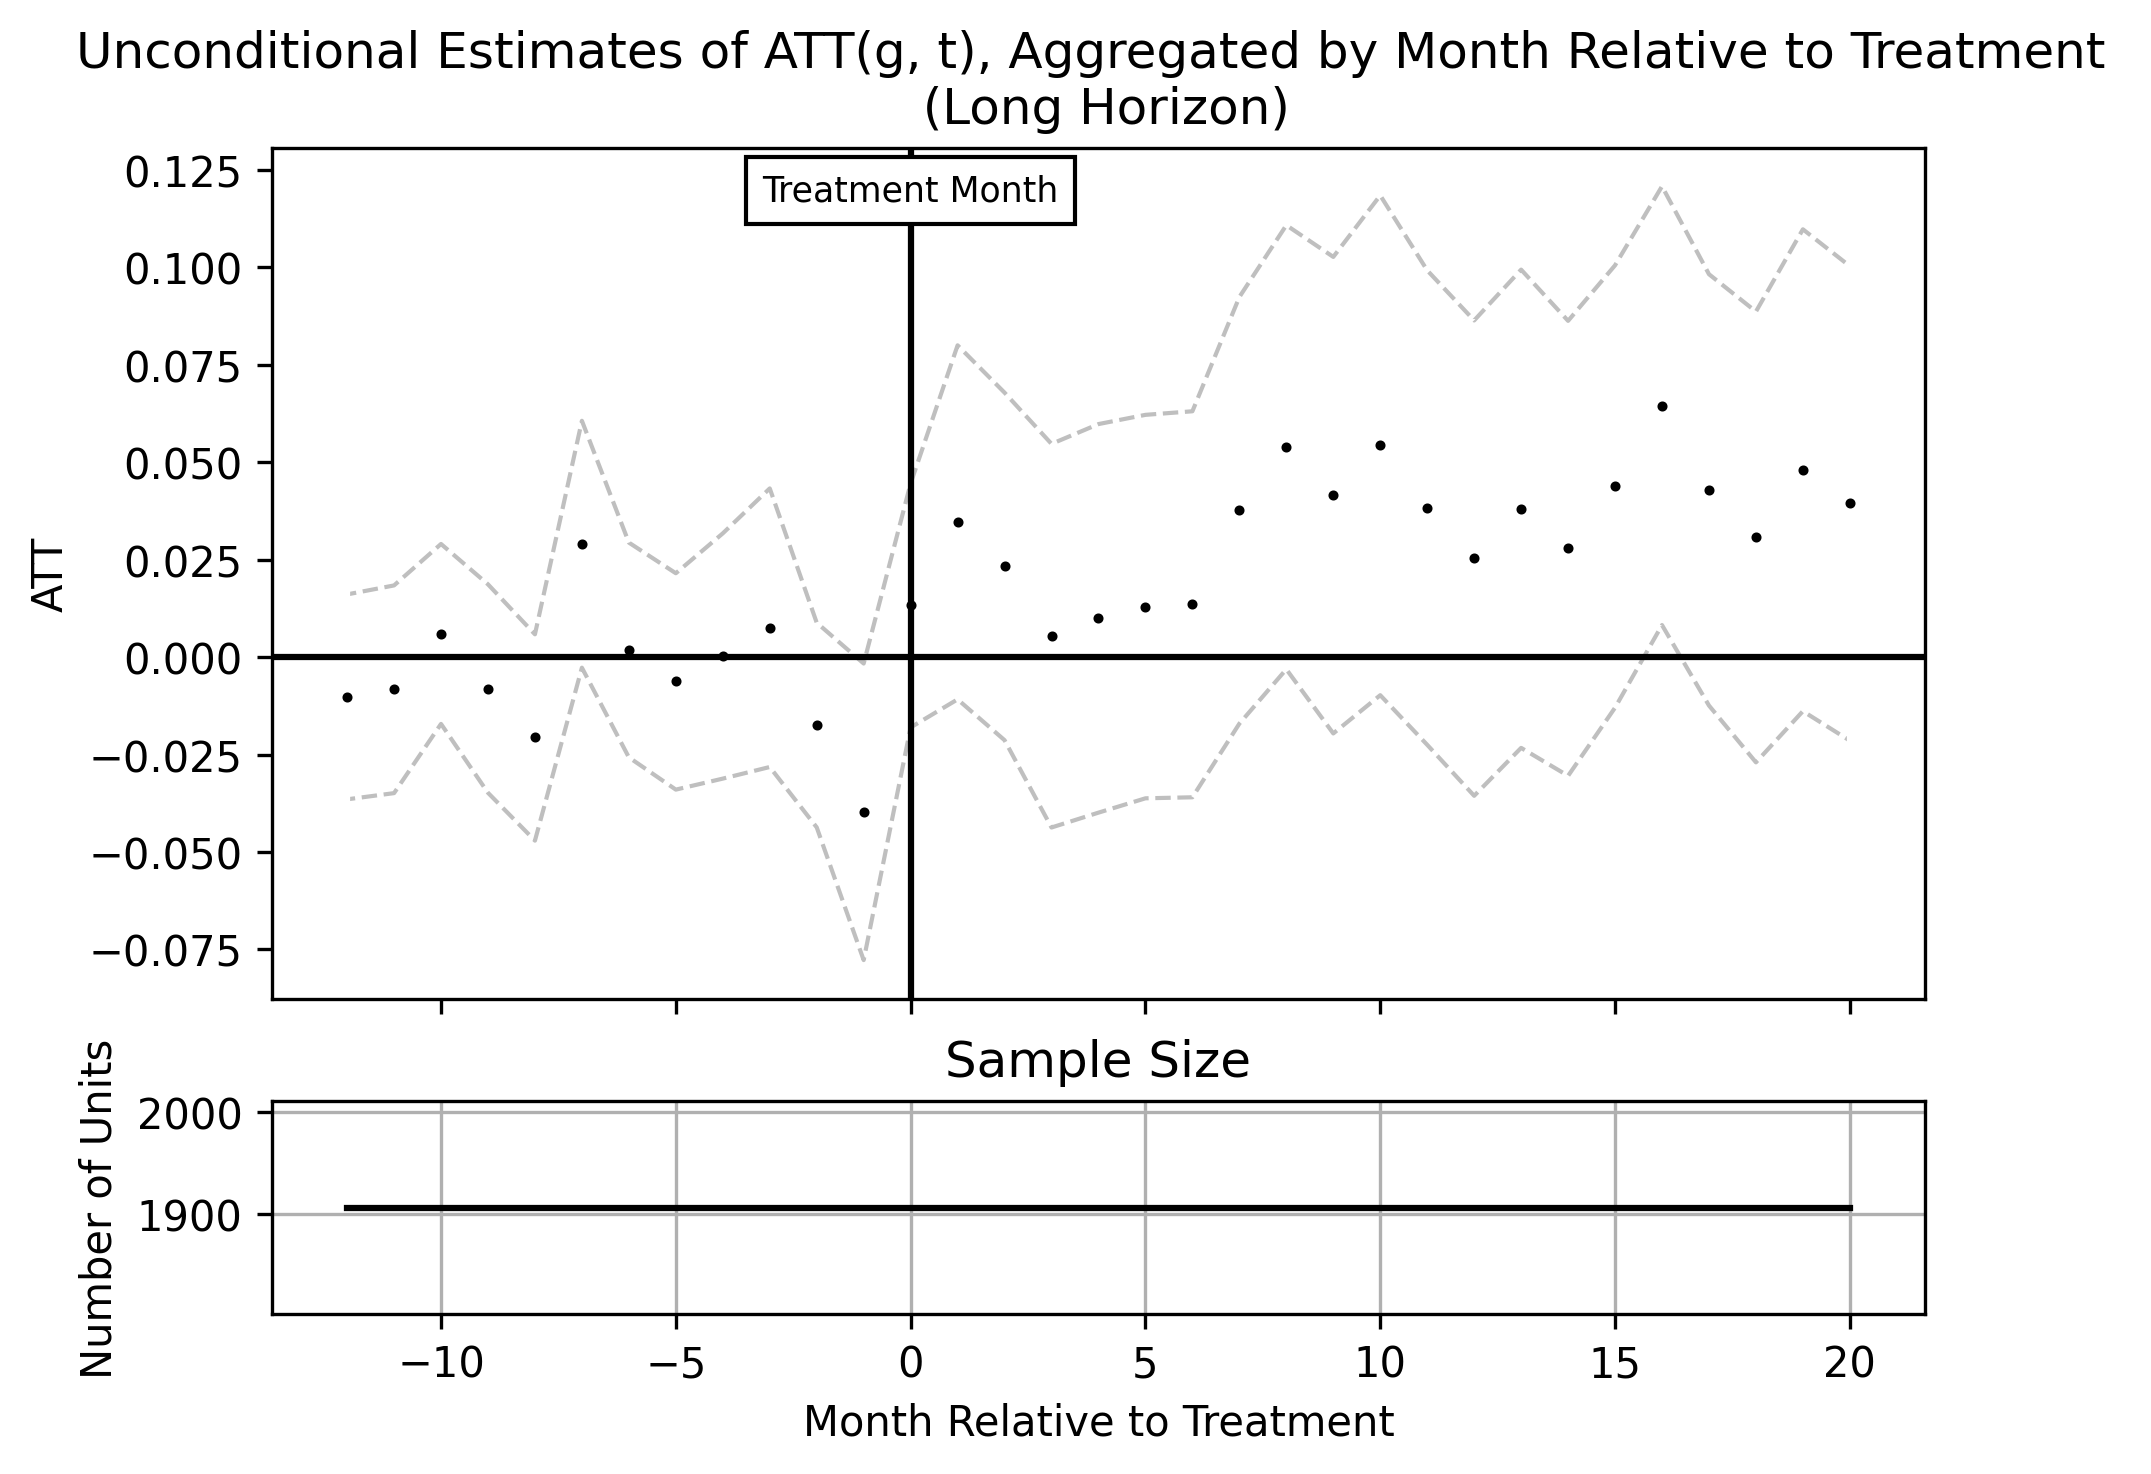

In [40]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

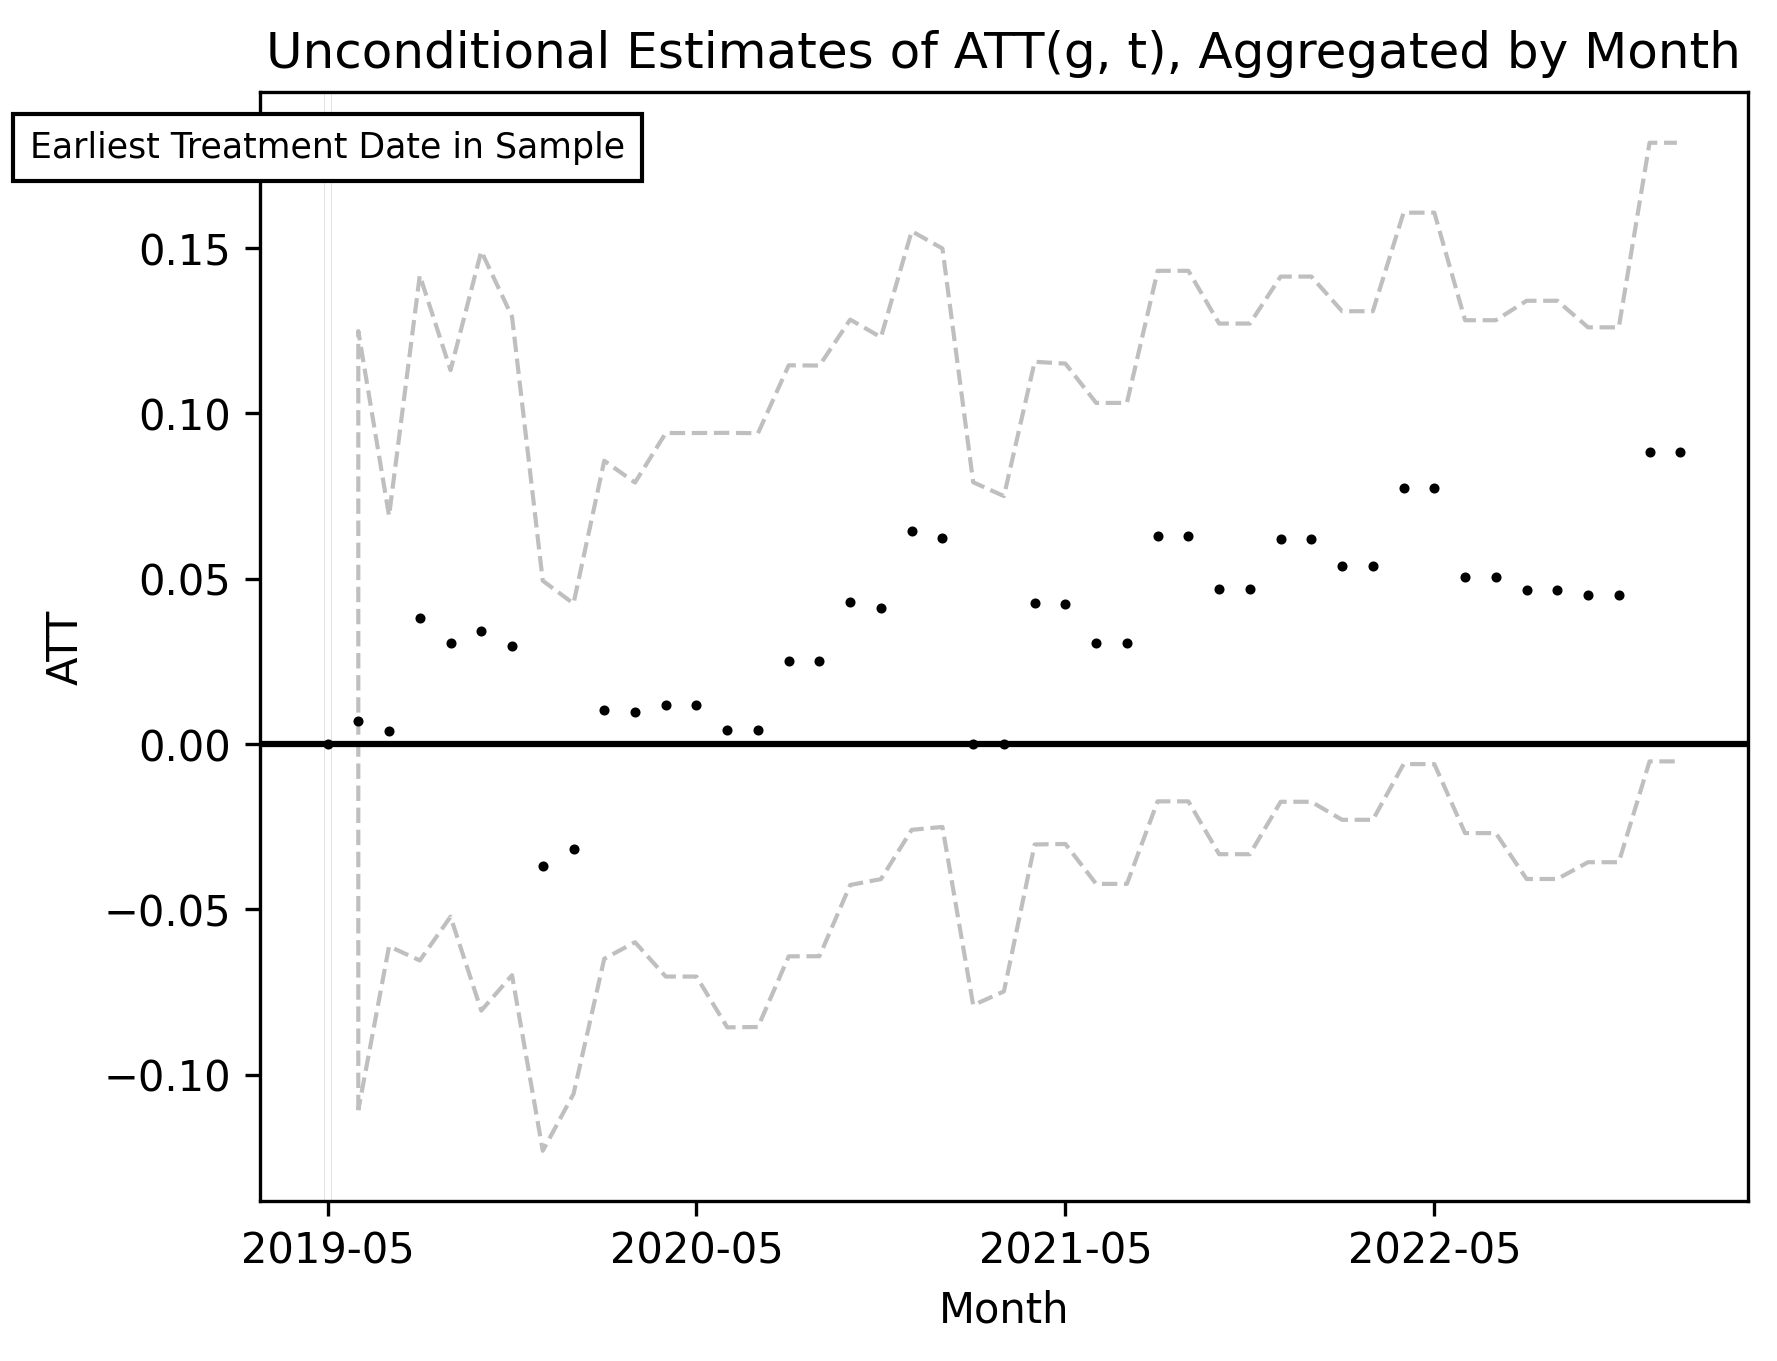

In [41]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [42]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]   54%|██████████▊         | 1180/2184 [00:49<00:28, 35.79it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
Computing ATTgt [workers=10]   54%|██████████▊         | 1186/2184 [00:49<00:25, 39.35it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/pytho

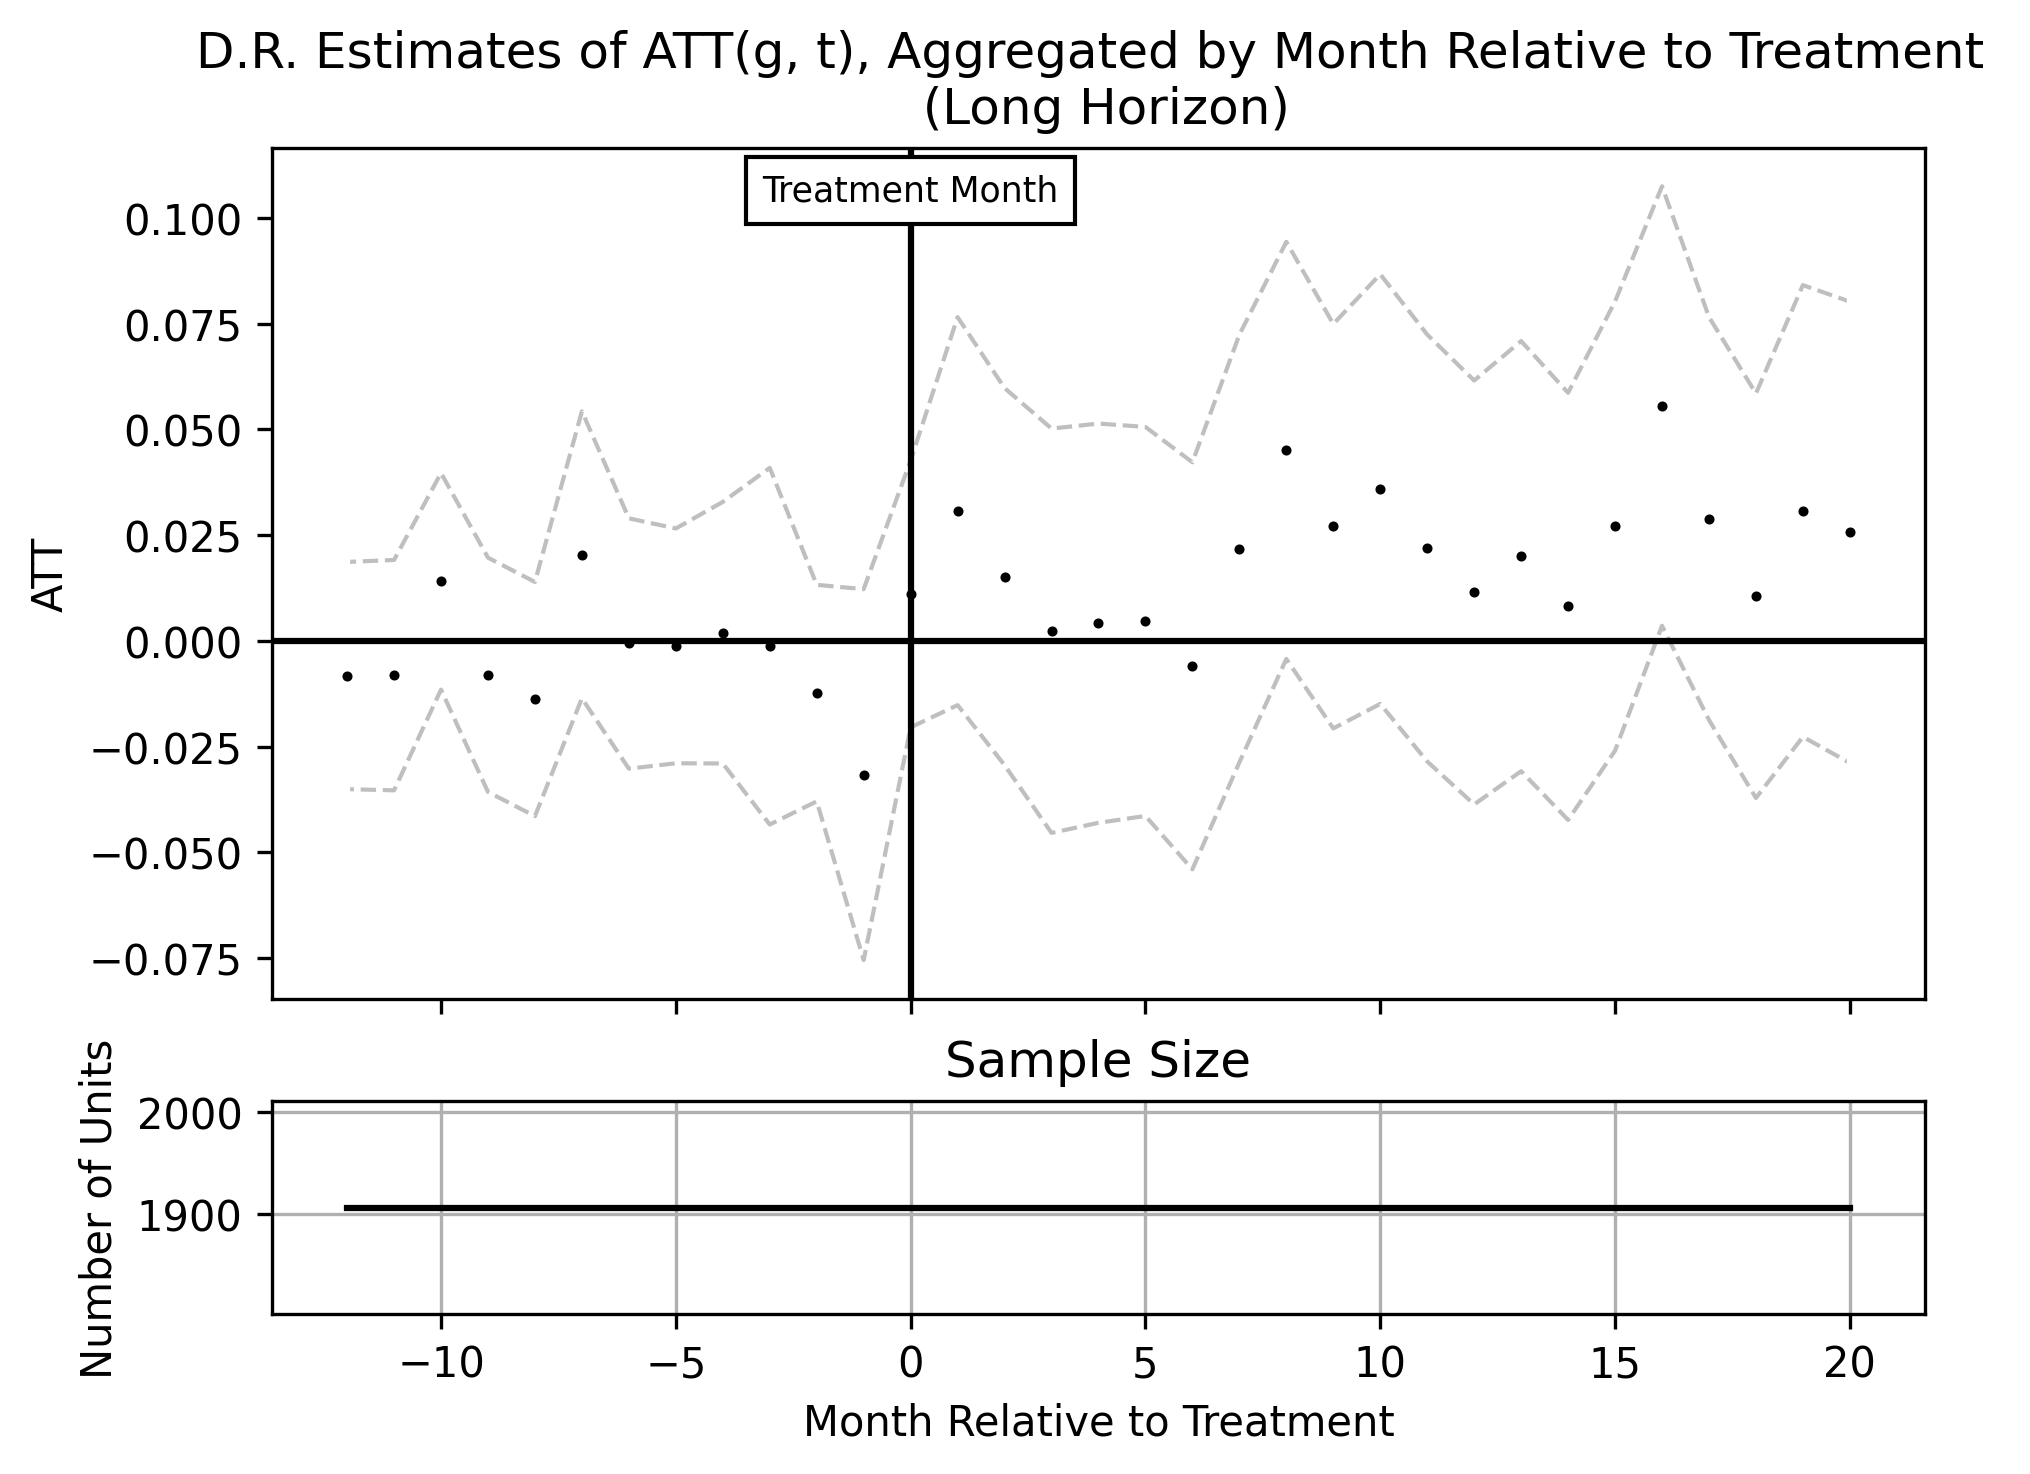

In [43]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

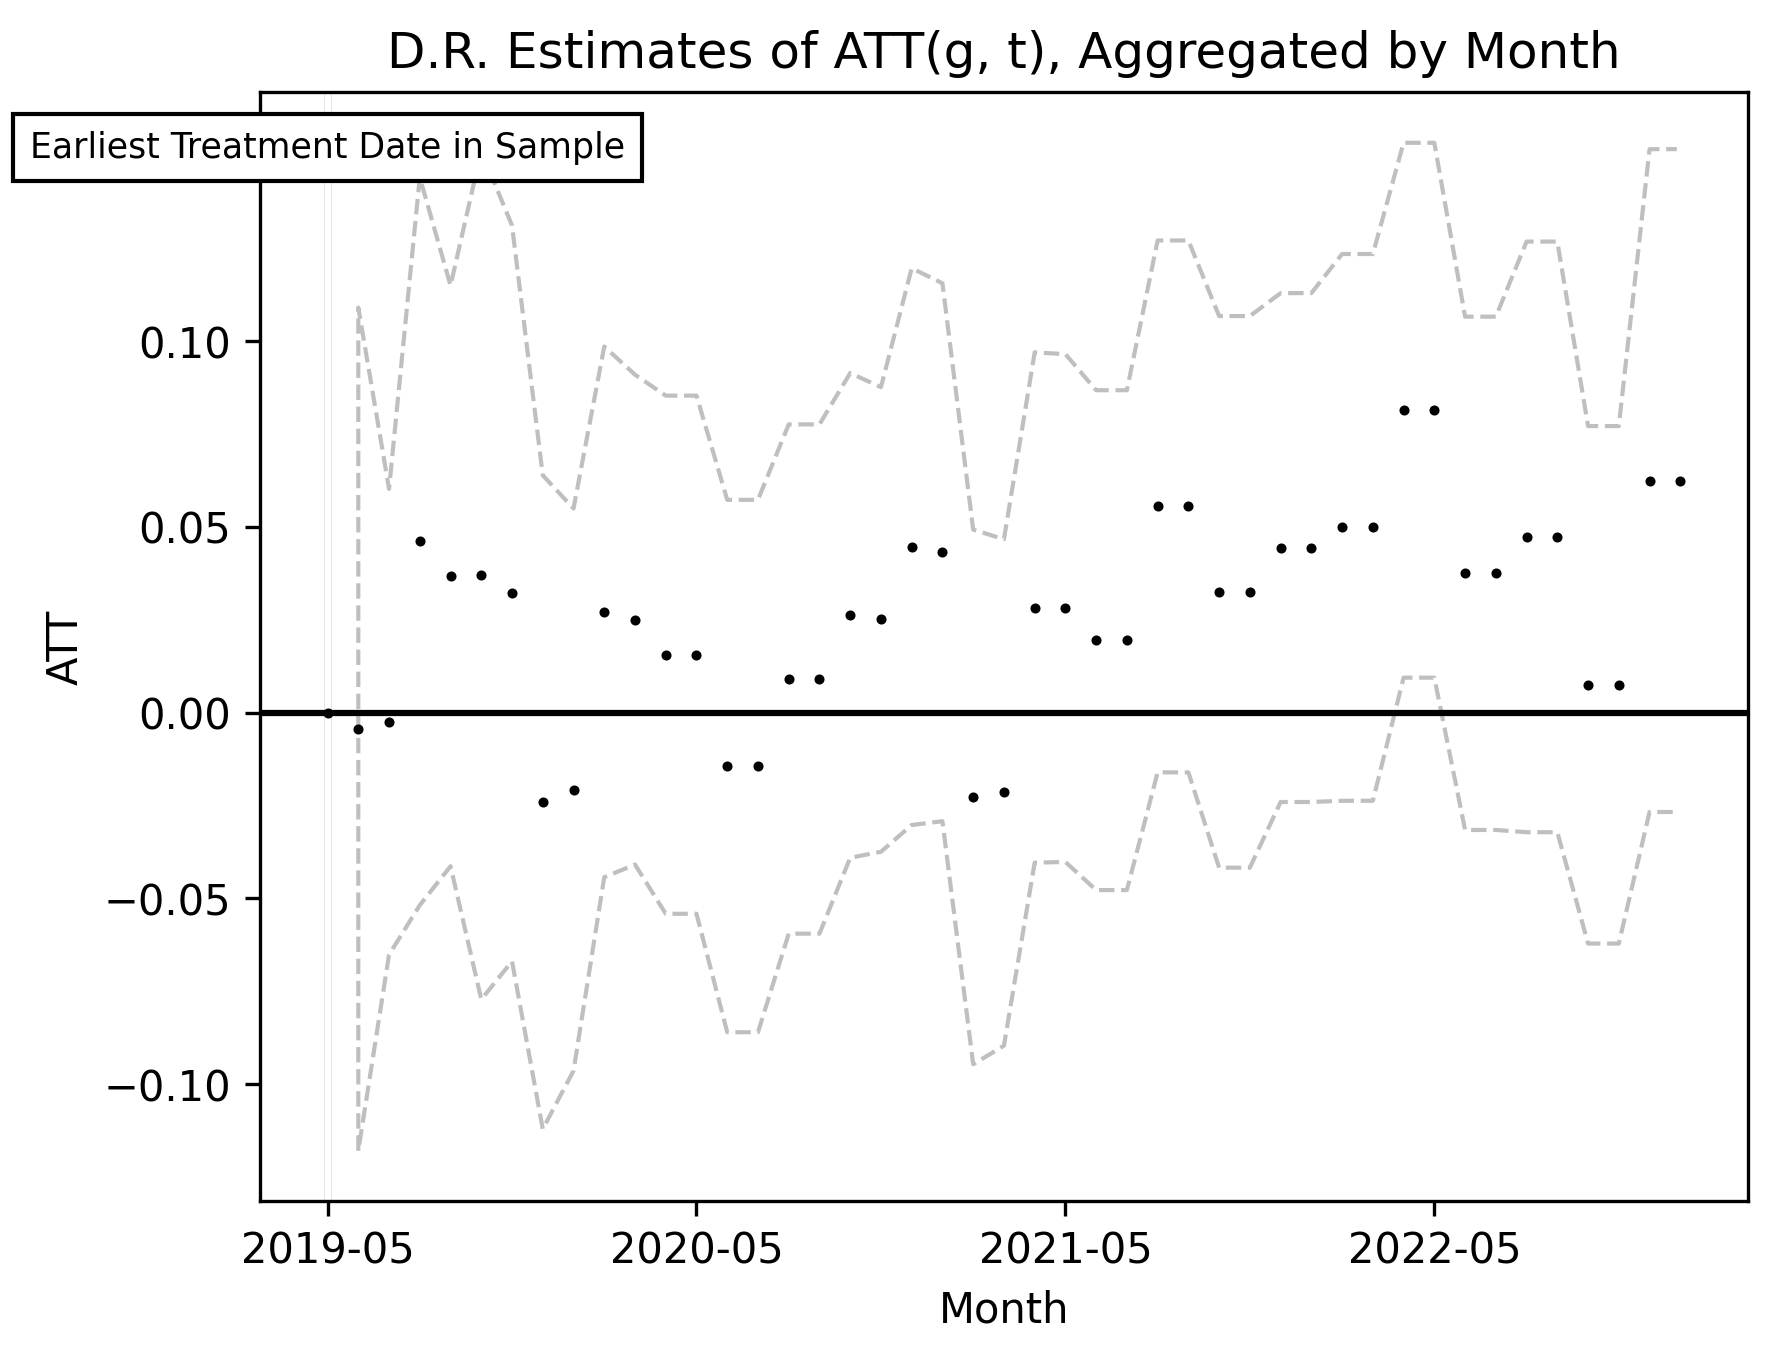

In [44]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")